# Practical Session 2
## Biomedical Signals and Images
### ETRO: Deparment of Electronics and Informatics
### Vrije Universiteit Brussel

Evgenia Papavasileiou, Hamza Mekhzoum and Jef Vandemeulebroucke
<br>
Questions email or Teams: hamza.mekhzoum@vub.be

<font color=blue>Students names and IDs: Seyed Hossein Mohammadi - 0610734 </font> <Br>
<font color=blue>Academic Year </font>: 2023-2024

### File upload in google colab:
You can upload the files that are needed for this exercise in google drive and then access them with the following code:

from google.colab import drive <br>
drive.mount('/content/gdrive') <br>

In the following link you can find alternative ways and [examples](https://colab.research.google.com/notebooks/io.ipynb)

### 1. Signal Denoising
ECG signals are usually distorted by a combination of high and low frequency noise as well as artificats of the frequency of the power line. The low frequency noise may be removed by using a highpass filter and the noise of
high frequency may be removed by using a lowpass filter.
### 1.1 Power Line Interference
Alternating current in the United States and several other countries oscillates at a frequency of 60 Hz and in the EU around 50 Hz. Those oscillations often corrupt measurements and have to be subtracted. Filtering of power line interference is very meaningful in the measurement of biomedical events, particularly in the case of recording signals as weak as the ECG. This kind of disturbance can be modeled by a sinusoid with respective frequency and random phase. Generally, methods used to reduce this kind of disturbance can be divided into two groups: methods based in spectral domain and methods based in time domain. Typically, for reduction of the AC interference in a spectral domain, a fixed or adaptive notch filter is used, i.e. a band-stop filter with a narrow stopband, while in time domain a moving average filter is often used.

### Exercise 1: Removal of Power Line Interference

- In python, load the noisy ECG signal ECG_ex1.mat using function [scipy.io.loadmat](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html).
Use functions [numpy.ndarray.astype](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html) to convert the values to float and function [numpy.ndarray.flatten](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html) to collapse the array in one dimension.
- Plot the signal in time domain with a sampling frequency fs=200Hz.

- Calculate the fourier transform of the signal using the [fft](https://docs.scipy.org/doc/numpy/reference/routines.fft.html) function and plot its magnitude.
<Br>

In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

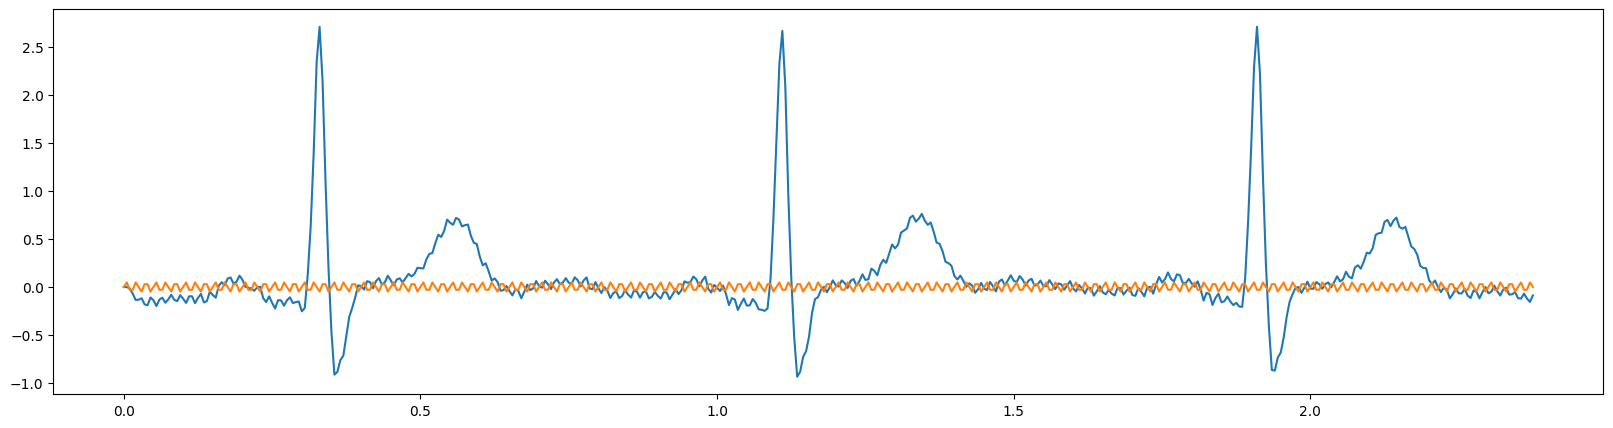

(-70.0, 70.0)

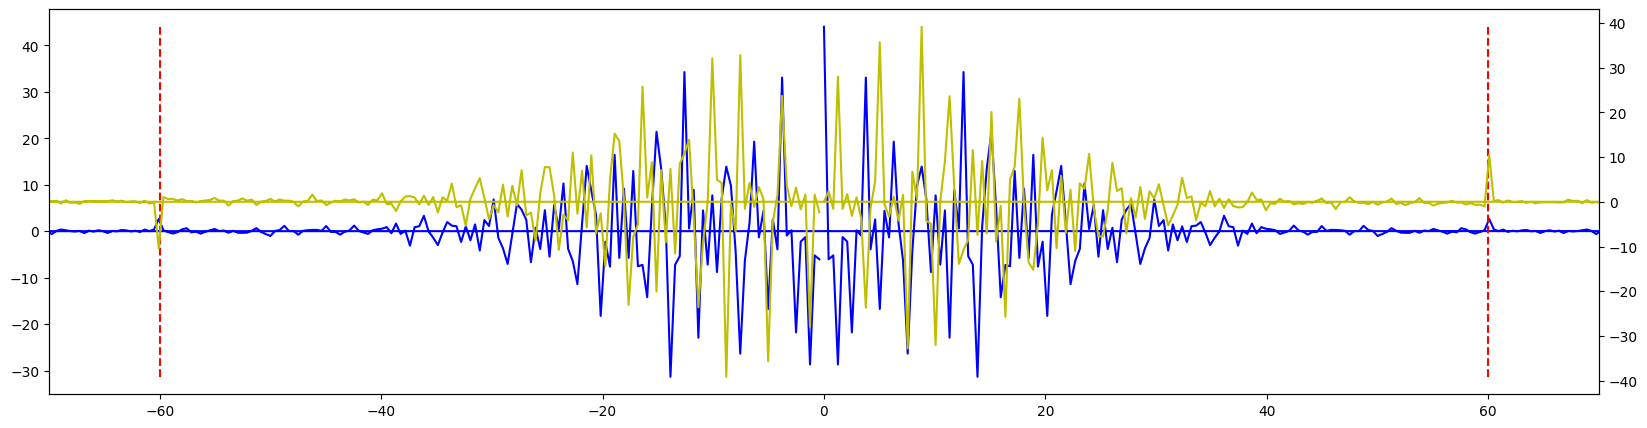

In [82]:
signal = scipy.io.loadmat('ECG_ex1.mat')['ecg'].astype(float).flatten()
t=np.linspace(0,len(signal)/200,len(signal), endpoint=False)
interference_signal = np.sin(2*np.pi*60*t)

plt.figure(figsize=(20,5))
plt.plot(t,signal)
plt.plot(t,interference_signal*0.05)
plt.show()

sp = np.fft.fft(signal)
freq = np.fft.fftfreq(len(signal),1/200)
fig, ax1 = plt.subplots()
fig.set_size_inches(20, 5)
ax2 = ax1.twinx()
ax1.plot(freq, sp.real, 'b-')
ax2.plot(freq, sp.imag, 'y-')
ax1.vlines([60, -60],min(sp.real),max(sp.real),linestyles='dashed',colors='r')
plt.xlim(-70,70)

Where do you see the frequency of the power line?<br>
<font color=blue>Your answer here:</font>
the orange signal is the power line interference and by looking at the FFT, we see it's at 60 Hz
as we can see, it matches the smaller oscillations of the ECG signal, actually, if we subtract the orange signal from the ECG signal, we will get a much cleaner signal

- Design a notch filter that remove the frequency of the power line that you observed from the above spectrum. Use the following [scipy.signal.iirnotch](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirnotch.html) function with a Quality factor=30. Plot the magnitude of the filter. 
- Filter the noisy ECG signal using the python function [filtfilt](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.filtfilt.html) and plot the filtered signal in the time domain.
- Calculate the Fourier transform of the ECG signal after filtering and plot its magnitude. <br>
 


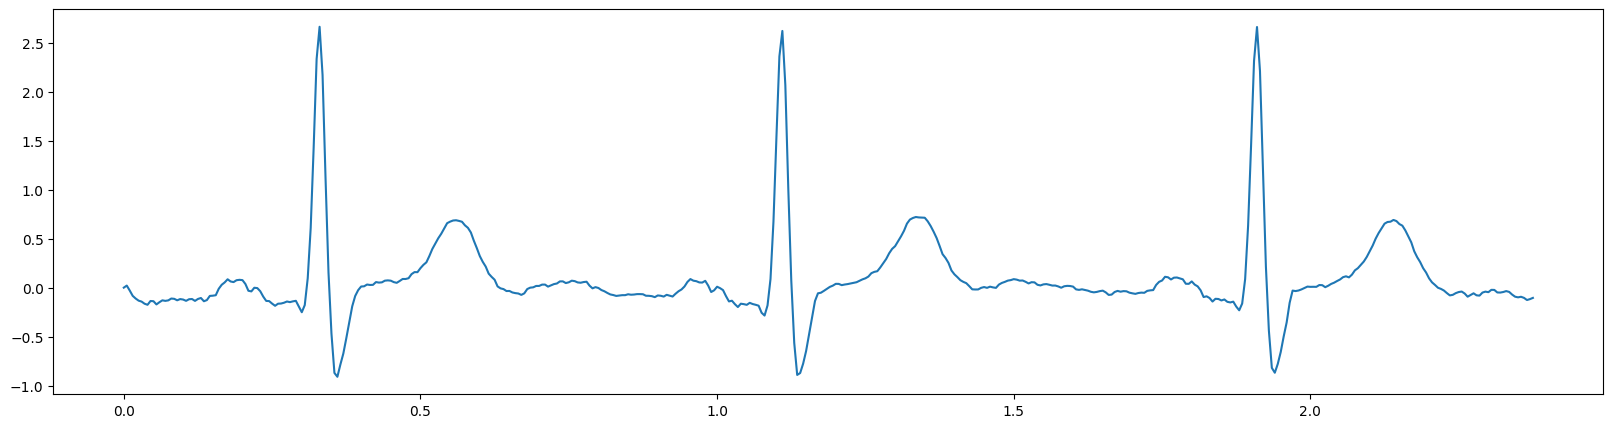

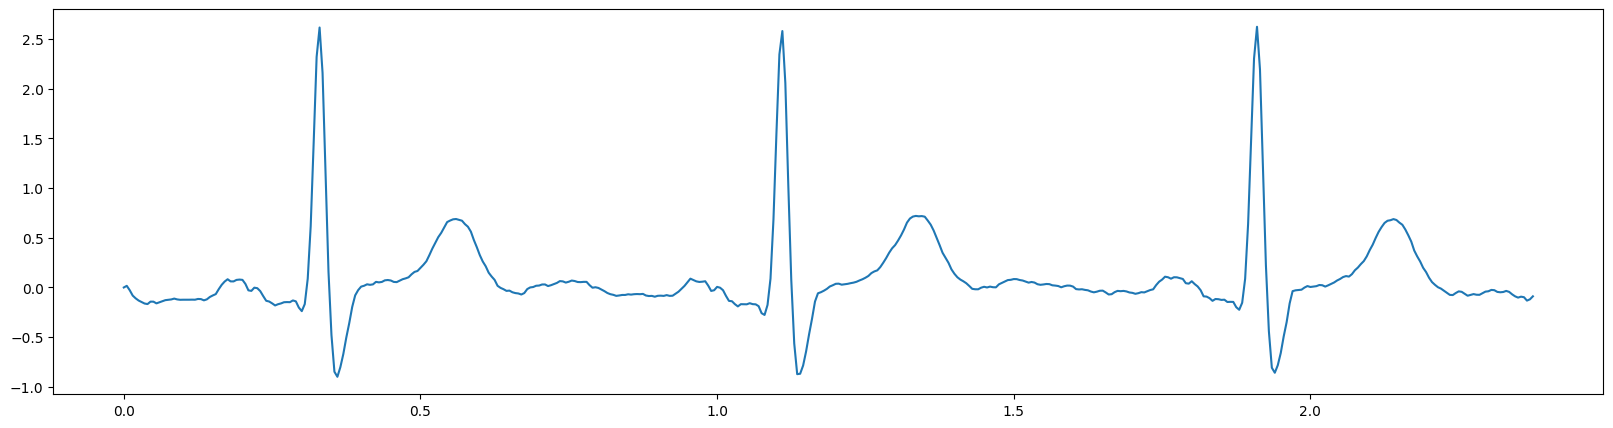

In [83]:
filtered_signal = scipy.signal.iirnotch(60,30,200)
new_signal = scipy.signal.filtfilt(filtered_signal[0],filtered_signal[1],signal)
plt.figure(figsize=(20,5))
plt.plot(t,new_signal)
plt.show()

filtered_signal = scipy.signal.iirnotch(60,5,200)
new_signal = scipy.signal.filtfilt(filtered_signal[0],filtered_signal[1],signal)
plt.figure(figsize=(20,5))
plt.plot(t,new_signal)
plt.show()

What do you observe from the frequency spectrum of the filtered ECG signal?<br>
<font color=blue> Your answer here: </font>
the power line interference is removed, but some steps are still there so i'm guessing the interference is not exactly at 60 Hz.
if we use a lower quality factor, these steps will go away

### 1.2 Digital Filters
Digital filters are systems that function on discrete signals to reduce or enhance specific aspects of the signal. In this exercise we will focus on filters that are used to improve the Signal to Noise ratio (SNR) of a signal, i.e. we will use filters to remove the noise from an ECG signal. A filter is defined by its transfer function in the z-domain or by its difference equation. The general transfer function for a linear, time-invariant, digital filter is defined as in (1)

\begin{equation*}
H(z) =\frac{b[0]+b[1]z^{-1}+b[2]z^{-2}+...+b[K]z^{-K}}{1+a[1]z^{-1}+a[2]z^{-2}+...+a[L]z^{-L}} = 
\frac{ \sum_{k=0}^K b[k]z^{-k}} { \sum_{l=0}^L a[l]z^{-l}} \quad\quad\quad\quad\quad\quad\quad\quad \text{(1)}
\end{equation*}

The corresponding difference equation is then

\begin{equation*}
y(n) = \sum_{k=0}^K b[k]x[n-k] - \sum_{l=0}^L a[l]y[n-l]      \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\text{(2)}
\end{equation*}

A special case of (1), (2) occurs if we set $a_{l}$ = 0 for l = 1, ..., L. Then we get the system in equation (3) which is known as the weighted moving average of the input signal.

\begin{equation*}
\quad\quad\ y(n) = \sum_{k=0}^K b[k]x[n-k]   \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\text{(3)}
\end{equation*}

The coefficients b[k] are known as the <b>weights</b>, or filter coefficients, or the weighting function or impulse response and K is known as the <b>length</b> of the filter.

### Exercise 2: ECG signal denoising using moving average fiter
- Load the ECG signal ECG_ex2.mat as in previous exercise. Use functions [numpy.ndarray.astype](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html) to convert the values to float and function [numpy.ndarray.flatten](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html) to collapse the array in one dimension. 
- Plot the signal in the time domain. Use sampling frequency fs = 1024Hz.
- Design a 3-points (K=3) and a 7-points (K=7) moving average filter. Each filter has equal weights that sum up to 1. Define your own generic python function which based on the number of points given (length of the filter K), calculates the filter kernel and applies it to your noisy signal based on looping through your signal to consider every window of size K.


      e.g def moving_average_filter(signal, K):

            .......
        
            return filtered_signal
        
- Plot three subgraphs the one under the other. The first plot should contain the original signal and the others the filtered signal after the application of each moving average filter (K=3 and K=7). Plot the filtered signals <b>on top</b> of the original signal. 



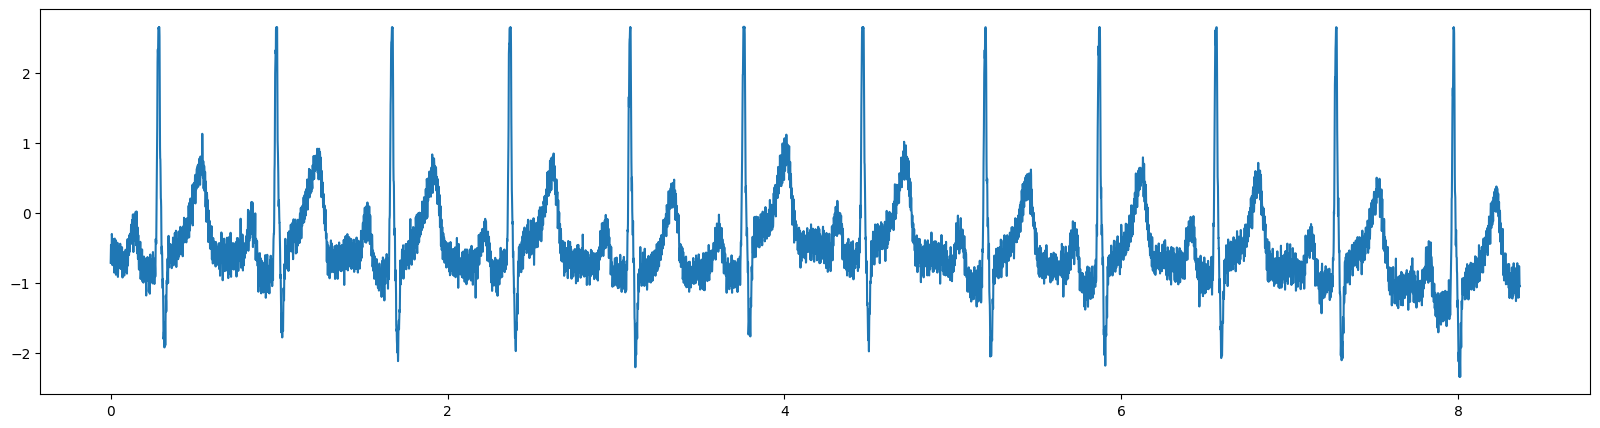

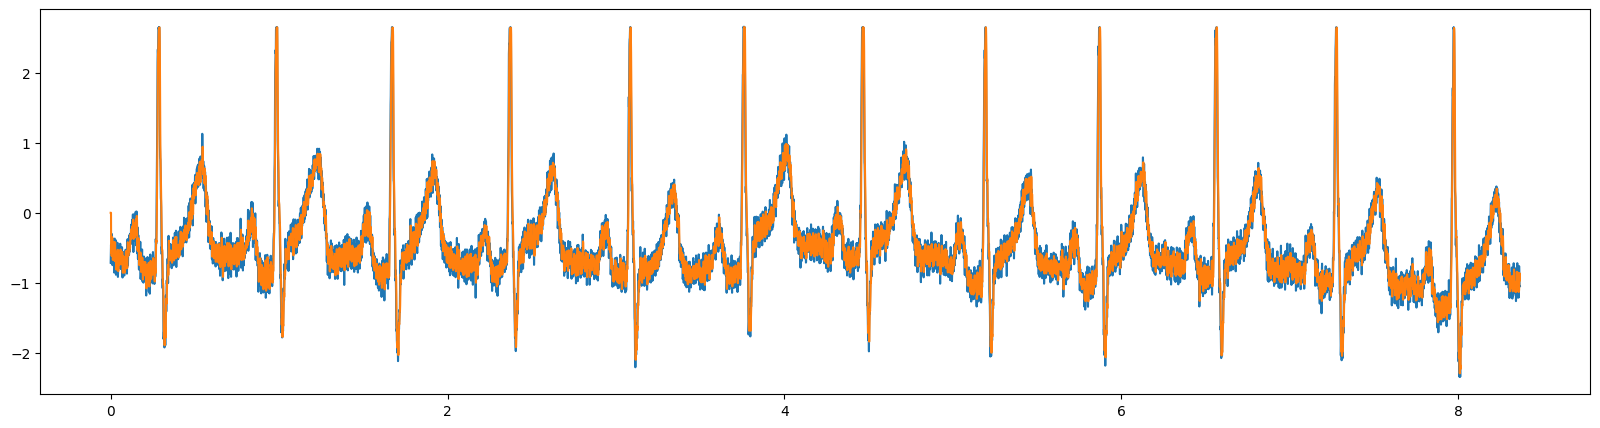

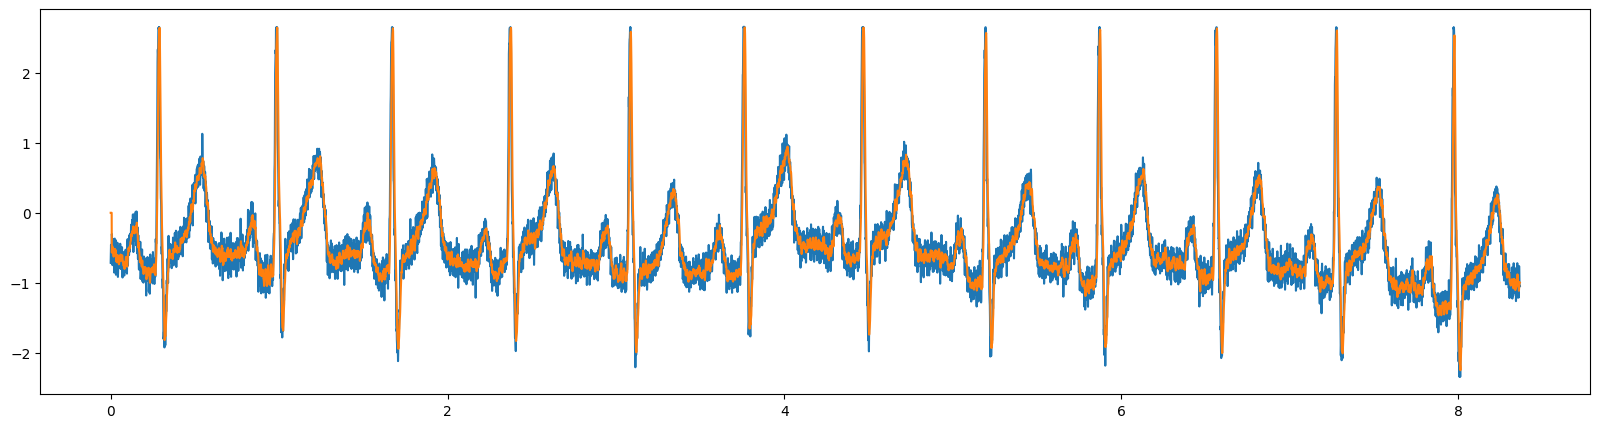

In [84]:
signal = scipy.io.loadmat('ECG_ex2.mat')['ecg_hfn'].astype(float).flatten()
plt.figure(figsize=(20,5))
t=np.linspace(0,len(signal)/1024,len(signal), endpoint=False)
plt.plot(t, signal)
plt.show()

def moving_average_filter(signal, K):
    y = lambda n: np.sum(signal[n-K:n])/K
    return np.array([0]*K+[y(n) for n in range(K,len(signal))])
filter_3 = moving_average_filter(signal,3)
plt.figure(figsize=(20,5))
plt.plot(t, signal)
plt.plot(t, filter_3)
plt.show()

filter_7 = moving_average_filter(signal,7)
plt.figure(figsize=(20,5))
plt.plot(t, signal)
plt.plot(t, filter_7)
plt.show()

Which filter removes the noise better and why? <br>
<font color=blue>Your answer here: </font>
the 7 point filter removes the noise better because we have many data points with larger window, and thus it can generate better averages.
if we had lower sampling frequency, the 3 point filter would have been better since the filter would be less lossy.


### 3. Peak detection
### Exercise 3: Peak Detection from ECG signals
In this exercise you will create an algorithm for the detection of the QRS wave of an ECG signal by implementing the following steps:<br>

<b>Part One: Apply a series of filters</b><br>
- Step 1: Load the ECG signal ECG_ex3.mat as in the previous exercises and plot it in the time domain using sampling frequency fs = 200Hz.
- Step 2: Normalize the ECG signal by dividing with the maximum absolute value. Plot the normalized signal.
- Step 3: Filter the signal you obtain from the previous step with a bandpass filter by cascading a low pass digital filter with cutoff frequency of 12 Hz and a high pass digital filter with cutoff frequency of 5Hz. Use function [scipy.signal.butter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html) to create the filters whose order be 3 and function [scipy.signal.lfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html) to filter the signal. Plot the filtered signals after each step.
- Step 4: Filter the signal of the previous step with a derivative filter that has the transfer function h = [-1, -2, 0, 2, 1]/8. From this you can get the b and a coefficients, i.e. b[0]=-1/8, b[1]=-2/8 etc. Again use [scipy.signal.lfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html) to filter the signal. Plot the filtered signal
- Step 5: Perform Squaring on the ECG signal you obtain after the derivative filter. Plot the filtered signal.
- Step 6: Filter the squared signal with a 30 point moving average filter. Plot the filtered signal. <br>

<b>Part Two: Use a built in python function on the original signal</b> <br>
- Use [find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html) function on the normalized ECG signal from <b>Step 2</b>, for finding the QRS complexes. Use distance 150 for the R and S peaks and prominence between 0.05 and 0.3 for the Q peaks. Plot the QRS complexes on top of the original signal. Keep a critical eye on the result. In this [link](https://www.google.com/search?q=qrs+complex&rlz=1C1PRFI_enBE772BE772&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiZ5_i24p_tAhXJzqQKHSW2BIMQ_AUoAXoECBEQAw&biw=1920&bih=937#imgrc=e1DK720GR0Ca-M) you can find an image that shows the Q,R,S peaks of an ECG signal. It is a good idea to use different symbols for depicting the Q,R,S peaks on top of the ECG signal.

- Calculate the heart beat using the following formula. 
\begin{equation*}
Heart Rate = 60/RRinterval in seconds.
\end{equation*}



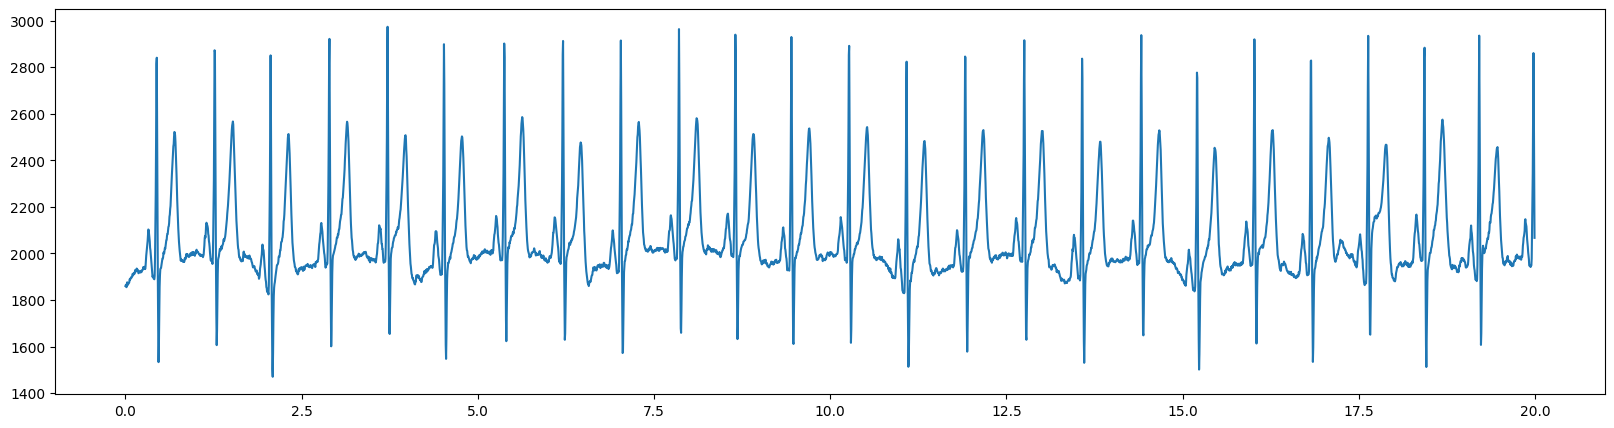

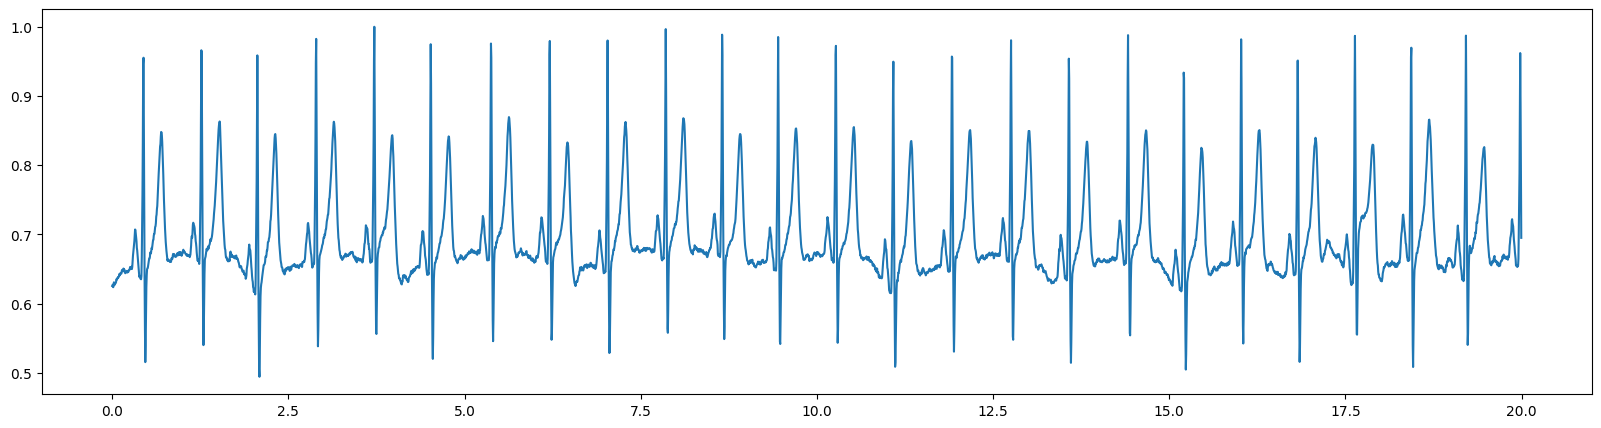

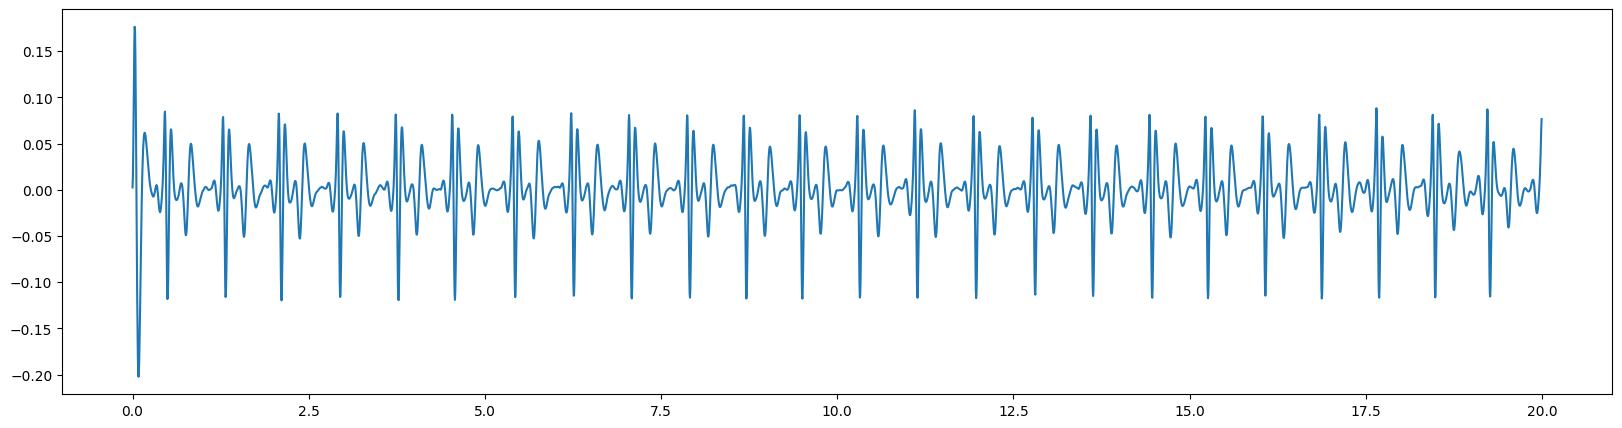

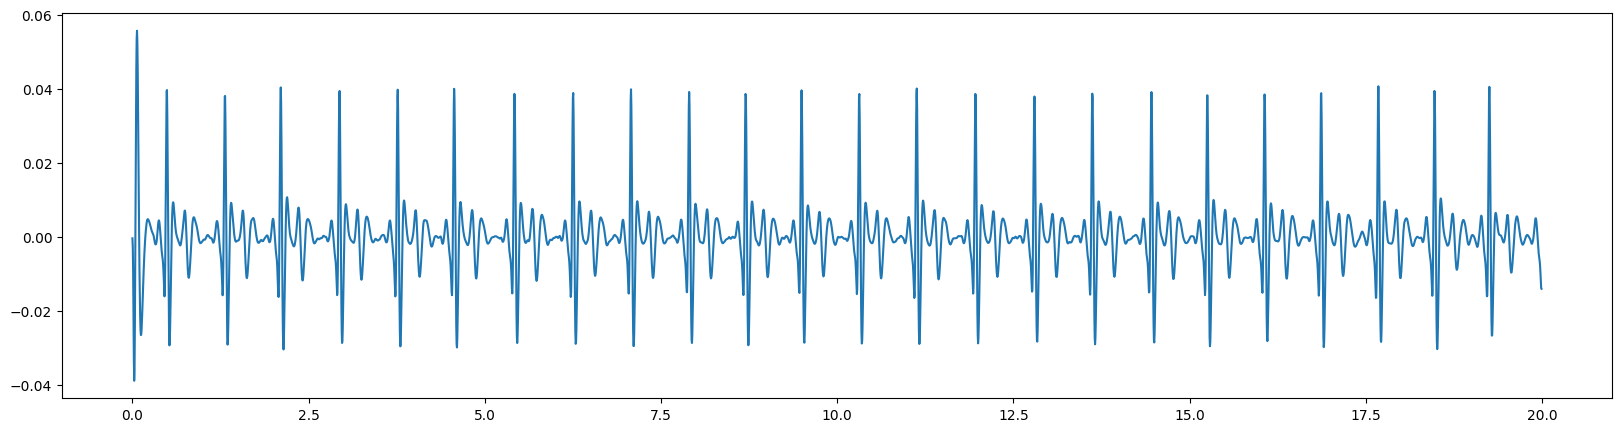

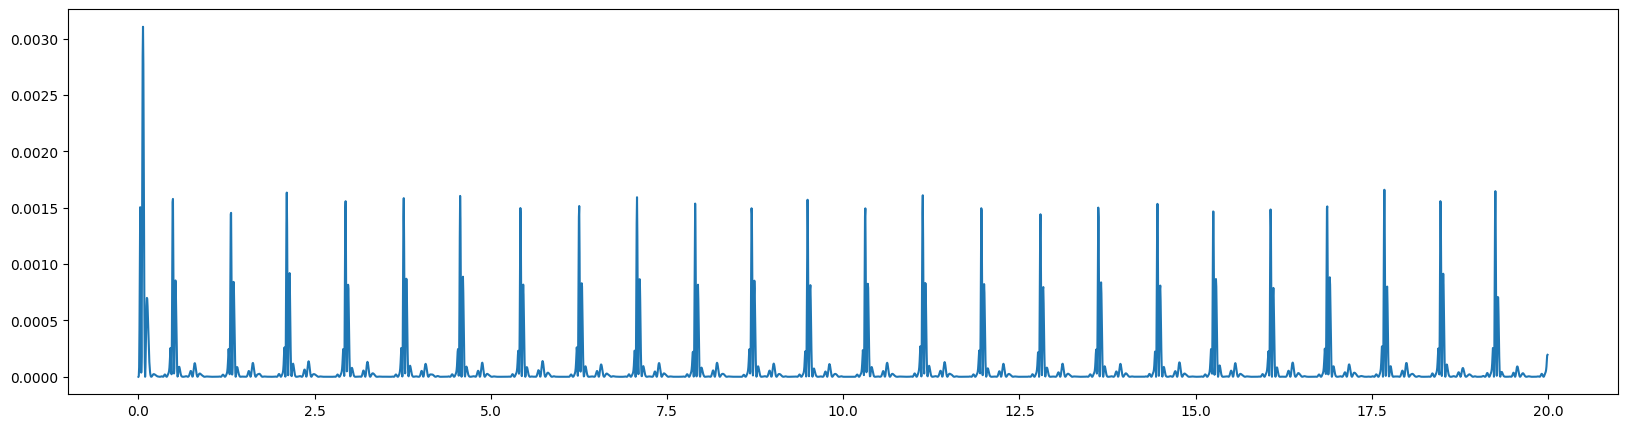

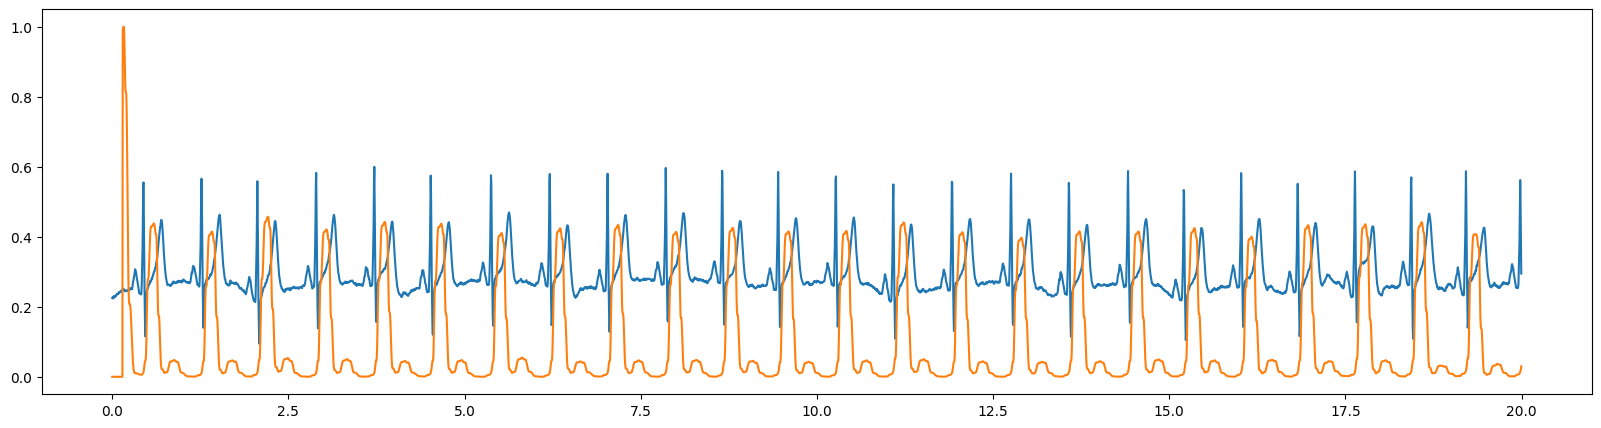

In [85]:
signal = scipy.io.loadmat('ECG_ex3.mat')['ECG'].astype(float).flatten()
plt.figure(figsize=(20,5))
t=np.linspace(0,len(signal)/200,len(signal), endpoint=False)
plt.plot(t, signal)
plt.show()

signal=signal/max(abs(signal))
plt.figure(figsize=(20,5))
plt.plot(t, signal)
plt.show()

b, a = scipy.signal.butter(3, 12/100, 'low')
filtered_signal = scipy.signal.lfilter(b, a, signal)
b,a = scipy.signal.butter(3, 5/100, 'high')
filtered_signal = scipy.signal.lfilter(b, a, filtered_signal)
plt.figure(figsize=(20,5))
plt.plot(t, filtered_signal)
plt.show()

# not sure about this one
b = np.array([-1, -2, 0, 2, 1])/8
a = np.array([1])
filtered_signal = scipy.signal.lfilter(b, a, filtered_signal)
plt.figure(figsize=(20,5))
plt.plot(t, filtered_signal)
plt.show()

filtered_signal = filtered_signal**2
plt.figure(figsize=(20,5))
plt.plot(t, filtered_signal)
plt.show()

filtered_signal = moving_average_filter(filtered_signal, 30)
plt.figure(figsize=(20,5))
plt.plot(t, signal-0.4)
plt.plot(t, filtered_signal/np.max(filtered_signal)*max(signal))
plt.show()

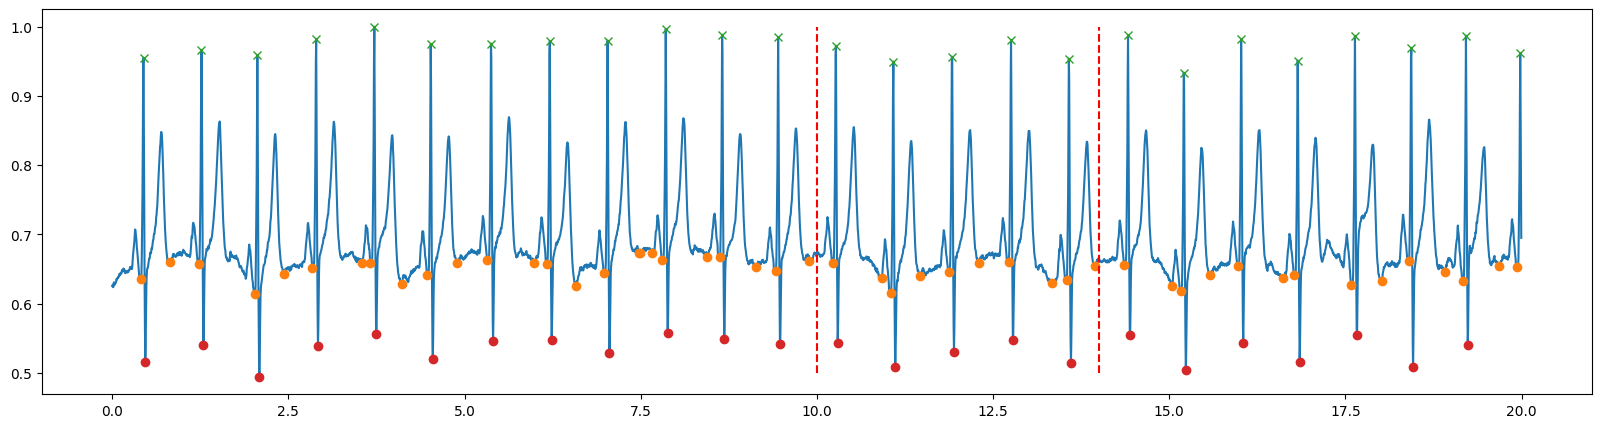

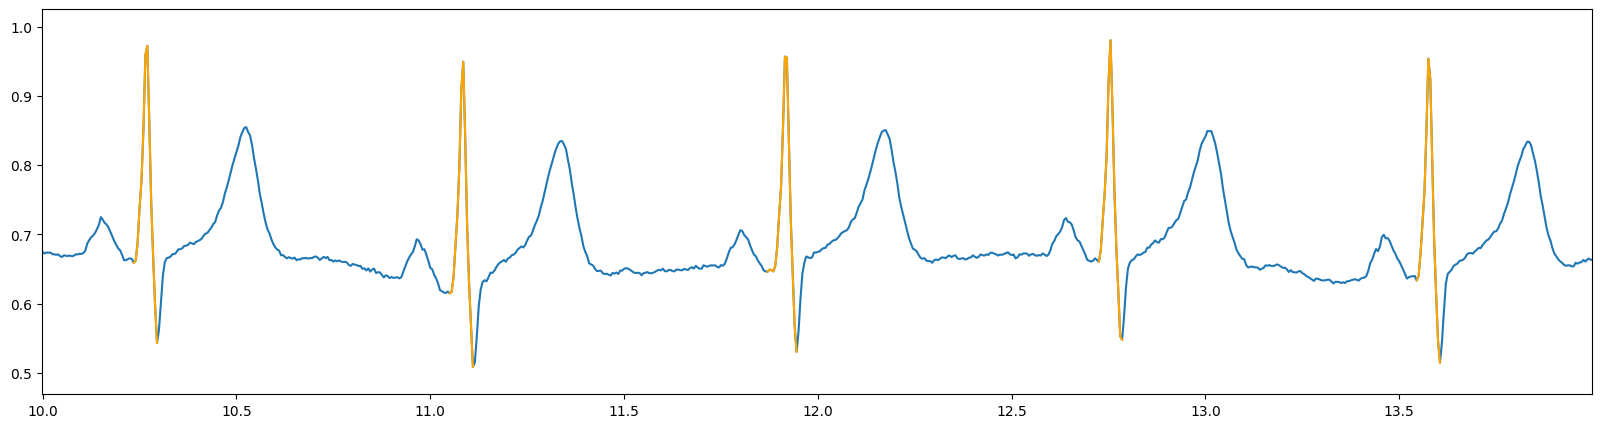

73.71384694138726


In [86]:
from scipy.signal import find_peaks
r_peaks, _ = find_peaks(signal, distance=150)
s_peaks, _ = find_peaks(-signal, distance=150)
q_peaks, _ = find_peaks(-signal, prominence=(0.05, 0.3))
plt.figure(figsize=(20,5))
plt.plot(t, signal)
plt.plot(t[q_peaks], signal[q_peaks], "o")
plt.plot(t[r_peaks], signal[r_peaks], "x")
plt.plot(t[s_peaks], signal[s_peaks], "o")
plt.vlines([max(t)/2,max(t)/2+max(t)/5], linestyles='dashed', ymin=0.5, ymax=1, color='red')
plt.show()

qrs=[]
for r_t in r_peaks:
    closest_q = min(q_peaks[q_peaks<r_t], key=lambda x:abs(x-r_t))
    closest_s=len(signal)-1
    if s_peaks[s_peaks>r_t].size!=0:
        closest_s = min(s_peaks[s_peaks>r_t], key=lambda x:abs(x-r_t))
    qrs.append(np.linspace(closest_q, closest_s, closest_s-closest_q+1, endpoint=True).astype(int))
plt.figure(figsize=(20,5))
plt.plot(t, signal)
for qrs_range in qrs:
    plt.plot(t[qrs_range], signal[qrs_range], color='orange')
plt.xlim(max(t)/2,max(t)/2+max(t)/5)
plt.show()

rr_intervals = np.average(np.diff(r_peaks))/200
print(60/rr_intervals)

What is the Heart Rate?<br>
<font color=blue>Your answer here: </font>
the area between the dashed lines is zoomed in and the QRS complexes are plotted on top of the original signal.
The heart rate is 73.7 bpm (on average)